## Part I: Scraping Twitter accounts

### a) [1 point] Connect to Twitter
* Create a Twitter app and login with your credentials.
* Fetch the most trendy topics for Athens and print the first 10 (HINT: woeid 946738).

In [1]:
from twitter_config import config
import tweepy
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import nltk
from nltk.tokenize import TweetTokenizer
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
auth = tweepy.OAuthHandler(config['consumer_key'], config['consumer_secret'])
auth.set_access_token(config['access_token'], config['access_token_secret'])

api = tweepy.API(auth)
# Where On Earth IDentifier locates to Athens with 946738 code
athens_id = 946738
# Retrive the trends on twitter on a specific location. api.trends_place returns one row list where in 'trends' trends are stored
trends_list = api.trends_place(id=athens_id)[0]['trends']
# Retrive the first 10 trends
for i,trend in enumerate(trends_list):
    if i <10:
        print(trend['name'])

#xfactorgr
#The2NightShow
#원호사랑해
βανδη
#paoefs
Happy Halloween
Γιαννης Σπανος
#AgriesMelisses
Πετσα
monty python


### b) [2 points] Scrape 10 usernames from "The 49 best Twitter accounts to follow in UK politics", found in the following URL, and put them in a list.
* Use the following resource: https://www.businessinsider.com/uk-politics-twitter-accounts-2016-8?r=US&IR=T#48-matt-singh-2

### Source i used
* https://stackoverflow.com/questions/3617797/regex-to-match-only-letters

In [2]:
r = requests.get("https://www.businessinsider.com/uk-politics-twitter-accounts-2016-8?r=US&IR=T#48-matt-singh-2")
html = r.content
soup = BeautifulSoup(html, 'html.parser')
# From inspection in the site we observe that names are in div tag and inside a class :slide-layout clearfix
review_titles_list = soup.find_all("div",{'class':'slide-layout clearfix'})
username = []

for i,review_title in enumerate(review_titles_list):
    # Store 10 instances .
    if i < 10:
#       Every username is located after <a target=_blank  tag 
        name=review_title.findNext("a",{'target':'_blank'}).get_text()
#       Use regular expression to strip the username from @ but preserve any other symbol (api.user_timeline in next question takes usernames without @)
        username.append(" ".join(re.findall('[a-zA-Z0-9_]+',name.strip())))
username

['Tom_Slater_',
 'MattSingh_',
 'asabenn',
 'robfordmancs',
 'LadPolitics',
 'samgadjones',
 'PaulbernalUK',
 'youngvulgarian',
 'JolyonMaugham',
 'IanDunt']

### c) [2 points] Fetch all tweets posted in the last 24 hours by each of the 10 selected usernames.

* Use try/except to bypass any one not present (e.g., deleted ones) and print "Cound not fetch @username" (where `username` is the name of the respective user).
* Use datetime, timedelta from datetime to define the last hour.
* Use `api.user_timeline` to fetch the tweets.
* Use a max limit of 100 tweets per user.
* Use `tweepy.Cursor`.

### Source i used 
* https://stackoverflow.com/questions/47931233/searching-for-tweets-in-last-24-hours-from-specific-accounts-with-twitter-api-in

>Tweets is a dictionary with usernames as keys and as values the tweets stored in a list 

In [5]:
# Get the time of the computer
now = datetime.now()
# Convert the time to UK time in order to match the time of tweets
now = now - timedelta(hours=2)
# Compute 24h gap
prev = now - timedelta(days=1)

count = 0
# Tweets are store in an dictionary 
tweets = {}
# Iterate for every username
for i in range(0,len(username)):
#     Every time we have a new username clear the list 
    tweets[i]= []
#     Use try catch in case a username does not exists 
    try:
#         Retrive the last 100 tweets for the timeline of every user
        for tweet in tweepy.Cursor(api.user_timeline,screen_name=username[i]).items(100):
            print(tweet.text)
#             Store the tweets in the list inside the dictionary 
            tweets[i].append(tweet)
            count +=1
    except:
        print("cound not fetch @",username[i])
# Use the auxiliary variable count to check how many tweets retrived in total
count


RT @spikedonline: Bercow was no warrior for democracy. He didn’t defend parliament against the overreach of the executive. He defended parl…
RT @JustineBrian: An opinion: election TV debates are dreadful; they shine no light on anything other than how well each person has been br…
RT @ggreenwald: The alt-right, Trump-supporting fascist Kremlin operative Tulsi Gabbard voted for the impeachment resolution against Trump,…
RT @KateHoeyMP: I am sorry to say but this is complete and utter nonsense and not a single Leave voter will believe it https://t.co/6hwwKRn…
RT @GeoffNorcott: ‘What are the cool kids saying these days?’
‘Well - if you can drag them away from their Mega Drives - it’s stuff like bo…
RT @typofoto: Shame about #Votesat16. I was looking forward to a new electoral system from now on whereby the opposition, a few weeks befor…
RT @J0ELcohen: How would 12th Dec #GeneralElection look? Join @greenmiranda @John_Mills_JML @jonnyrobertball @Tom_Slater_ @Sherelle_E_J  de…
RT @spikedonl

@CDP1882 I’m stealing this
RT @CDP1882: I lament the poor judgment of senior journalists who, after decades of covering major incidents of illegal warring and expense…
RT @spikedonline: Jess Phillips once said she would knife Jeremy Corbyn ‘in the front’. Ed Davey said Remainers should unite to ‘decapitate…
RT @TheSimonEvans: But Johnson is the one whose language is intemperate. https://t.co/nL7PCuQojU
RT @JamesHeartfield: @BBCNewsnight @EdwardJDavey Oh, yeah, sure @EdwardJDavey https://t.co/s2kO7clRO0
RT @PaulEmbery: I’m quite happy for Labour MPs to launch wars on poverty, unemployment, pollution and so on.

But this war on metaphor is a…
So Boris isn't allowed to use the word surrender now? Because the public are so barbaric and mad that they'll take… https://t.co/J6elhs4dFR
The ruling class has lost its mind.
RT @danieljohnsalt: You mean like when remain refused to accept the referendum result and then delegitimised the result - only all this ste…
Says it all. https://t.co/laGuqp3p

@NeilGarratt @sundersays It is with ours. Others vary. Most (including some of the ones that publish breaks) have shocking EM samples.
@sundersays It's currently 10-11% of eligible voters, but I agree that there needs to be a proper study
@PeterWalker59 Yes that is true, but it depends how many votes are tactical
RT @Slarty247: Need to work on my #GE2019 #Swingometer this is the rough diagram I made after the last election. @MattSingh_ 

NB: SNP are…
Something often overlooked. Remember – in 1983 the Tory vote share was actually *lower* than at the previous electi… https://t.co/mtGRxH8HPy
RT @AmberRuddHR: Moving on.  Good luck to colleagues in forthcoming GE.                            Amber Rudd reveals she will not stand at…
@philipjcowley @JohnRentoul https://t.co/GomaryQEPh
RT @lisanandy: Praying for a better level of debate in this #GE19 (with little expectation). But he is so right https://t.co/lQuw3SufEU
@edofmund Can't please everyone...
Lib Dems regain Eastbourne before the el

@GeorgeTrefgarne Jo Swinson said she wouldn't push such an amendment, so as long as HMG doesn't provoke the Lib Dem… https://t.co/fVsbCB5WFC
RT @TeleComment: People's Vote never fooled anyone - no wonder it's tearing itself apart, says @asabenn
https://t.co/6AqIjX8iX8 https://t.c…
RT @A_Liberty_Rebel: "Everyone can see that People's Vote, despite its pretence of just caring about democratic propriety, is just a front…
Meanwhile in CCHQ, an official hears about the news that the EU27 are delaying Brexit until 2020... https://t.co/l6ox3gDiAT
Macron's anti-extension stand is over - https://t.co/Uc5rSjhGyZ
"Someone once said Labour had more Brexit positions than the Kama Sutra, but now it looks more like 50 shades of de… https://t.co/0fSNIksQD1
The new Addams Family is a pale imitation of this... 👇 https://t.co/N28lOlNXdi
RT @hendopolis: TELEGRAPH: Lib Dems offer PM route to an election #TomorrowsPapersToday https://t.co/84NtvPXg93
Triumph for the Brexiteer fans of GATT Art24! 🎊 https://t.

RT @IsabelHardman: I’ve written for tomorrow’s Telegraph on how unattractive Parliament is now as a place for normal people to work https:/…
RT @philipjcowley: This is a good piece by @DArcyTiP on Bercow.

My view is that it was a Speakership of two halves.

In the first, he did…
RT @sarahobolt: Calling Political Scientists:

The 2019 European Election Study #EES2019 #EUelections2019 has been released! 

Great resour…
@post_liberal The original sense of "social capital" was "social resources which helped individuals get ahead" - li… https://t.co/Rys4X1gNxG
@post_liberal Social contact effects are some of the most robust findings in social science!
@post_liberal I'm not sure this is really a social capital story tbh as its about emotions and social identity. I f… https://t.co/McZdcRrGUE
@pennyb And Leave activists too.
The problem is that emphathy, like all our social feelings, tends to be bounded - we emphathise with "us" much more… https://t.co/oqSmBlKNa9
This is fascinating research.

Plenty of interesting seat by seat betting now available. https://t.co/j4WrwrbzhC
@nickjenkins01 @BadgerFool no, singles only I'm afraid
@ABLPoli no
@GabrielRychert yes, i think we will soon
@BadgerFool not all of them no. will gradually release as many as we can
@oneandonlymr0 probably not, sorry
Done a bar chart. https://t.co/BBYCTUCTcx
Liberal Democrats are 6/1 to unseat Jacob Rees-Mogg in Somerset North east https://t.co/PzbMZsbGio
@ElGuaje_4 @LeftieStats 3 weeks before polling day I think
@ElGuaje_4 @LeftieStats we definitely will have prices but i think we may have to wait for nominations to close for this one
@jamesmgcox yes, some will have to wait until nominations are closed though
@kings_0f If we do any NI seats, it probably won't be until after nominations close
@JrHutton1988 @Ladbrokes Oh dear, thanks for pointing it out. Will correct.
@davidrobbo66 which ones?
@jamesrbuk Sure, here is the latest. https://t.co/gERuufqz87
@georgegalloway @AbiWilks https://t.co/PVh9nGOz8X
@Ab

Gloves are off: with just hours to go before the cutoff, Philippa Strache decides she will take up her seat in the… https://t.co/QugUCyyKSk
🤦‍♂️ https://t.co/UfcKwkPwWy
A short masterclass in German kitten synonyms. https://t.co/j8exKivBVg
Fascinating. Russia been moving along this vector: TV5 Monde/Lazarus/WannaCry, now this. Turla I think were also be… https://t.co/Y5lj1lTd93
RT @holland_tom: What could possibly have been happening to put them off religion? https://t.co/YpEg33im4s
#linksrutsch ! Swiss voters deliver decisive shift towards green parties https://t.co/U4q32oLUG8  @FT
RT @EpicureanDeal: “It is better to be a human being dissatisfied than a pig satisfied; better to be Socrates dissatisfied than a fool sati…
Question now is how this will affect the ‘Zauberformel’ used to nominate the 7-man ruling cabinet. Lots of speculat… https://t.co/JclOk5Gz3x
Latest projection in the Swiss Federal Elections today sees (for Switzerland) a pretty notable #linksrutsch - slide… https://t.c

I almost didn’t RT this. But then I did. https://t.co/IzeLDKDkoW
@Alteredgeist Ouch!
@Snyberwiz More like telling people they *must* sell your their kidneys, and pretending it’s fine because they’re g… https://t.co/rHy6NGUKmG
We’ve been talking about this for a long time. Turning our privacy into something that can be bought and sold is on… https://t.co/wTzGEJ6jyM
@Timjag72 @philbc3 Right now, they’re one of the best news sources - and Murdoch’s no longer involved. He effectively sold it in 2018.
@speedyneg I’m sure it will be.
RT @snigskitchen: Wow. Sarah Vine tries to make big point about Hugh Grant being rude. (Wasn't there, so I can't comment!) Turns out Hugh m…
@Mowman123 And Rowland is one of the best.
RT @Otto_English: It's happened folks. That massive pro Brexit demo has taken place on what should've been Brexit day. Extraordinary scenes…
@jimmy2yk What do you mean ‘your’? I’m not part of the Labour Party.
This looks very interesting indeed. :) https://t.co/lX5Txv66MH
RT @SCyni

@bouledenerfs_ It's so fun!!
@steamedhamms Yes, sorry, I forgot you live among the trees and have little to entertain yourself with, my bad
@AbiWilks Omg! I was thinking of going to NY next September, I guess I could make that NY and DC in late October...
@steamedhamms Christmas is a less horny and less goth holiday, what's the point of that
@AbiWilks I have been wildly jealous of your Halloween and even broke my usual No IG Stories rule to watch yours and Kadhim's
@steamedhamms It's the best, it's goth and also boozy with a hint of slutty, what more could you possibly want from a yearly event
I have nothing but disdain for people who dislike Halloween and when I am finally in charge, it will last for the e… https://t.co/Xmui8dq5t0
RT @journodave: election night is December 12 meaning all the results come in on Friday 13th
RT @anguswalkertalk: Interviewed @RosieDuffield1 for News at Ten - tells me police advice to some female MPs is not to go out alone or in s…
behold, the most Lib Dem

RT @ElectCalculus: Intriguingly, @BestForBritain's large MRP poll produces very similar answers to our monthly regression-based poll-of-pol…
RT @NickCohen4: Have bought sugar-free,additive-free vegetarian  "sweets" for the neighborhood kids. That'll teach the little sods to trick…
@EdwardDocx Hung Parliament?
RT @miqdaad: As editor, Fraser Nelson bears ultimate responsibility for the vile racism &amp; Islamophobia that is pouring out of the Spectator…
@hselftax @robertnpalmer @TaxJusticeUK @taxwatch @carysroberts @RichardJMurphy @DanNeidle @adamcorlett… https://t.co/c06kv8aLFV
@matt_blewebear @Nigel_Farage Happy Halloween to you too, Matt!
@heidiallen75 Top, top gifing Heidi! x
RT @heidiallen75: Delightful email just in from "gentleman" called Michael...apparently 

"The Party is very well rid of you and your cohor…
RT @JasonGroves1: Uh oh. Donald Trump tells @LBC he's warned Boris Johnson his Brexit deal might hamper free trade agreement with the US: '…
@Nigel_Farage Is the NHS on the

We have just been told by the Government that the relevant European Union (Withdrawal) Act 2018 (Exit Day) (Amendme… https://t.co/RVeoDWz6ND
We have just been told by the Government that the relevant European Union (Withdrawal) Act 2018 (Exit Day) (Amendme… https://t.co/wd0yduVPmQ
@SimonSidleman It should be, of course.
@AlbertoNardelli I hope they're right.
@AlbertoNardelli Where do you get that from? The EU's understanding (recorded here) is not necessarily the same as… https://t.co/1ScnOZZ6kr
@yezzer Indeed. But I'd rather not rely on that.
@cats_servant Thanks, is there a link, please?
@jesperg29 do you have a link, please?
@SimonSidleman Thanks; I am aware of that. But what the EU understands is not conclusive evidence of fact.
Is anyone keeping track of MPs standing down by gender?
No desire to cause alarm but... https://t.co/f5W0QV3YIe
In the circumstances, we are seeking an urgent hearing before the Inner House and are instructing Counsel to appear.
No regulations have yet been

RT @JolyonMaugham: In the circumstances, we are seeking an urgent hearing before the Inner House and are instructing Counsel to appear.
@hugorifkind But that was the only reason I liked it.
Watching Tory MPs nod sagely every time Johnson says the machine programmed 'dither and delay' lines is really something.
What a way to go, really. For someone of Clarke's stature and history to leave the Commons an independent, chucked… https://t.co/XTRmvi1Jao
RT @woodstockjag: So they have until Thursday 31 October at 22:59 to do it, but I can’t help but notice the Government does not appear to h…
He either refused to pay his respects out of spite, or because he forgot. Either way, he hands a big meaningful Tor… https://t.co/Wc9K6lKzGu
Worth noting this moment. Johnson having a pretty shoddy time at the dispatch box. Not emotionally convincing, or i… https://t.co/QC29Ps1xML
"The rt hon gen is one of the most popular and respected politicians in our country. He deserves the warmest apprec… https://

1000

### d) [1 point] Validate that the correct results have been retrieved and fix if not.
* Use the `created_at` attribute per Status object returned by the `api.user_timeline` to check if the tweet is false (created more than 24 hours ago).
* Print how many of the retrieved tweets for each username were false and remove them.

In [6]:
# store the keys (numbers that correspond to the usernames). Did it outside the loop becase it crashes in the loop 
keys=[a for a in tweets.keys()]
# Itterate over every username
for key in keys: 
#   For every user we count how many tweets created before 24 hours
    counter = 0
#   n is the total number of tweets retrieve per username
    n = len(tweets[key])
    for i in range(n):
#       use for debugging (if we run the cell twice it does not find extra tweets)
        if tweets[key][i] != None:
#           Check if the created date is before 24h 
            if tweets[key][i].created_at < prev:
#               Every old tweet is deleted stored as blank 
                tweets[key][i] = None
#               Count how many tweets are old
                counter+=1
    print(counter,"tweet(s) retreive(d) and is/are more than 24 hours old, from @",username[key])



96 tweet(s) retreive(d) and is/are more than 24 hours old, from @ Tom_Slater_
68 tweet(s) retreive(d) and is/are more than 24 hours old, from @ MattSingh_
92 tweet(s) retreive(d) and is/are more than 24 hours old, from @ asabenn
55 tweet(s) retreive(d) and is/are more than 24 hours old, from @ robfordmancs
88 tweet(s) retreive(d) and is/are more than 24 hours old, from @ LadPolitics
95 tweet(s) retreive(d) and is/are more than 24 hours old, from @ samgadjones
0 tweet(s) retreive(d) and is/are more than 24 hours old, from @ PaulbernalUK
53 tweet(s) retreive(d) and is/are more than 24 hours old, from @ youngvulgarian
49 tweet(s) retreive(d) and is/are more than 24 hours old, from @ JolyonMaugham
49 tweet(s) retreive(d) and is/are more than 24 hours old, from @ IanDunt


## PART II: Processing Twitter accounts

### a) [2 points] Scrape the Twitter accounts of all the UK parliament members and put them in a `DataFrame`.
* Scrape from: https://www.mpsontwitter.co.uk/list the following table columns: `Name, Screen Name, Constituency, Party` and `Followers`.
* Put them in a DataFrame with columns: `name, username, constituency, party, num_followers`
* Make sure that the values of `num_followers` are shown as numbers, not strings.

### Sources i used 
* https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059
* https://stackoverflow.com/questions/56512915/invalid-literal-for-int-with-base-10-2-674 

>The site we scrape has a table where the columns we want to retrive are stored.Every table has the following html structure:Under <body tag there is a <tr table row tag and under this tag there is <td tag where the text we are looking for is located 

In [44]:
r = requests.get(" https://www.mpsontwitter.co.uk/list")
html = r.content
soup = BeautifulSoup(html, 'html.parser')
# Find the body of the html page
table = soup.find("tbody", {"id":"mp_wrapper"})
# in the body we search for all the tr tags
rows = table.find_all("tr")
# All the information will be saved in a tuple where in first place will be the column name and in the second a list with the values and all these tuples will be stored in a single list
col = []
# Create the tuples with the column names and an empty list for the values
col.append(("name",[]))
col.append(("username",[]))
col.append(("constituency",[]))
col.append(("party",[]))
col.append(("num_followers",[]))
# Iterate over every tr tag occurrence 
for row in rows:
#   In <a> tag username is located
    screen_name = row.find("a")
#   In <span> tag is located the index number . we use it in order to retrieve the name in next command
    number = row.find("span")
    name = number.find_next("td")
#   The next <td> tag after username has the constituency
    constituency = screen_name.find_next("td")
#   Next <td> tag after the constituency has the party 
    party = constituency.find_next("td")
#   Next <td> tag after party has the followers
    followers = party.find_next("td")
#   In col list the first index is for the column and the second for the values
    col[0][1].append(name.get_text())
    col[1][1].append(screen_name.get_text())
    col[2][1].append(constituency.get_text())
    col[3][1].append(party.get_text()) 
    col[4][1].append(int(followers.get_text().strip().split()[0].replace(',', '')))
# Store the list in a dictionary with keys the column names
Dict={title:column for (title,column) in col}
# Store the dictionary in a DataFrame
df=pd.DataFrame(Dict)



In [48]:
df.head()

,name,username,constituency,party,num_followers
0,Adam Afriyie,@AdamAfriyie,Windsor,Conservative,14961
1,Alan Duncan,@AlanDuncanMP,Rutland and Melton,Conservative,26121
2,Alan Mak,@AlanMakMP,Havant,Conservative,8343
3,Alberto Costa,@AlbertoCostaMP,South Leicestershire,Conservative,8996
4,Alec Shelbrooke,@AlecShelbrooke,Elmet and Rothwell,Conservative,15090


### b) [1 point] Create a hierarchical index. 
* The `party` being the top level and `num_followers` being the next.
* Show the `username` along with the `party` and the `num_followers`.

In [7]:
# Set index the party in first level and the number of followers in the second 
hierarchical_df = df.set_index(["party","num_followers"])
hierarchical_df["username"]

party                    num_followers
Conservative             14944                @AdamAfriyie
                         26088               @AlanDuncanMP
                         8324                   @AlanMakMP
                         8993              @AlbertoCostaMP
                         15053             @AlecShelbrooke
                         3330                @alexburghart
                         8394              @AlexChalkChelt
                         17539             @AlokSharma_RDG
                         13731                 @AlunCairns
                         7741               @amandamilling
                         112132               @AmberRuddHR
                         51897              @andreajenkyns
                         113809             @andrealeadsom
                         0                  @AndrewBowieMP
                         27757                   @ABridgen
                         14831                   @AJonesMP
                 

### c) [1 point] Assess the "power" of each party in Twitter.

#### i) Visualise the number of followers per party.

* Use groupby.
* Use barplot *and* seaborn.

### Sources i used 
* https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum
* https://stackoverflow.com/questions/32908315/could-not-interpret-input-error-with-seaborn-when-plotting-groupbys/32908624

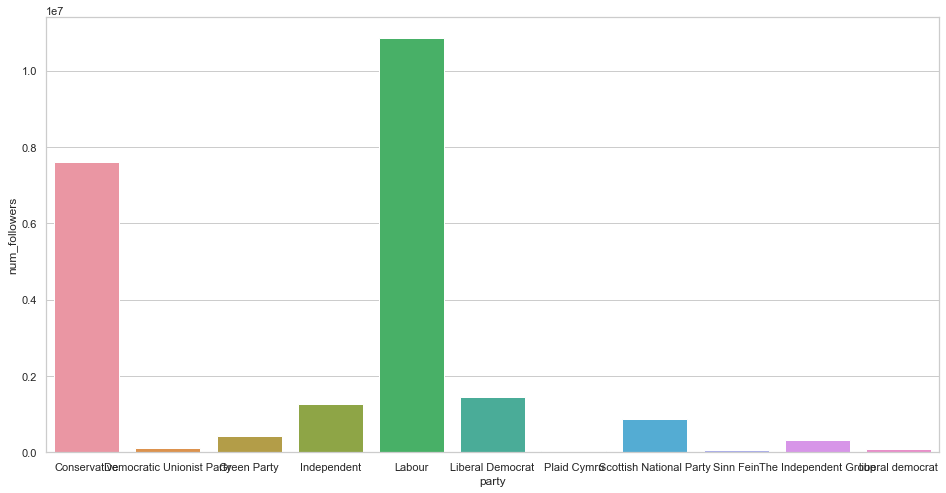

In [47]:
# Group the dataframe for every party and sum 
grouped = df.groupby(["party"]).sum()
# In the grouped dataframe we set the party column as index in order to plot 
grouped['party'] = grouped.index

sns.set(style="whitegrid")
# Set the size of the figure
plt.figure(figsize=(16, 8))
# Set the variable for x and y axes
ax = sns.barplot(x="party", y="num_followers",data=grouped)

>The most powerful party on Twitter is the labour party.However since Labour and Conservative parties are the biggest parties in the pariament we expect to have the majority of followers, therefore the chart is misleading as it is .A possible solution is to express the number of followers as quotient of followers over the number of members of each party .

#### ii) Based on the results, can you conclude about which party is the most "powerful" in Twitter?

* Suggest another thing we should be searching for to answer this question.

## Part III: NLP

### a) [2 points] Use a list of bad words to estimate swearing in tweets
* Use the list of abuse words from: http://staffwww.dcs.shef.ac.uk/people/G.Gorrell/publications-materials/abuse-terms.txt
* Fetch the words and discard any noise (ΗΙΝΤ: use only terms in this list and discard any redundant information concatenated to the terms)

### Source i used
* https://stackoverflow.com/questions/23259110/python-splitting-a-string-twice

> The site is divided in three distinct parts the first has the description ,the second is a dictionary with 404 words and the thrid is the same dictionary without several lemmata and with comments. Those three parts are between asterisks 

In [56]:
r = requests.get("http://staffwww.dcs.shef.ac.uk/people/G.Gorrell/publications-materials/abuse-terms.txt")
html = r.content
soup = BeautifulSoup(html, 'html.parser')
# Split the dictionary in three parts and keep the second.Remove the whitespace replace the last line and split for every line
dictionary = soup.text.split("************************************")[1].strip().replace("TOTAL: 404","").split("\n")
# Keep the 404 first rows the last is empty
dictionary = dictionary[0:404]
# keep the third part of the split ,remove the whitespace, replace the last line and split for every line
dicti = soup.text.split("************************************")[2].strip().replace("TOTAL: 388","").split("\n")
dictionary2 = []
# loop for every row in the second dictionary in order to remove the comments
for i in dicti:
#   split every comment and keep the first part which is the word 
    dictionary2.append(i.split("\t")[0].strip())
# Keept the 388 lines the rest are empty
dictionary2 = dictionary2[0:388]
# merge the two dictionaries searching for the intersection of the unique elements.(A set has only unique elements)
diction = list(set(dictionary)&set(dictionary2))

In [124]:
# The last dictionary has smaller length because the word "moron" is duplicate
import collections
print([item for item, count in collections.Counter(dictionary).items() if count > 1])

['moron']


### b) [2 points] Parse a list of (annotated as) offensive tweets and filter "bad words"
* Read tweets from: https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv and rename `tweet` column to `text`.
* The class column specifies in which category the tweet belongs. A tweet can be classified into 3 categories: hate speech (class 0), offensive language (class 1) and neither (class 2). For more details see: https://aaai.org/ocs/index.php/ICWSM/ICWSM17/paper/view/15665 
* Create a new column with the words of the each text, saved in a list.

### Sources i used
* https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.api.TokenizerI
* https://stackoverflow.com/questions/875968/how-to-remove-symbols-from-a-string-with-python

>Use two different ways of tokenize the sentenses in order to compare the performance one with nltk.word_tokenize and one with TweetTokenizer

In [51]:
# Download and save the csv file in a DataFrame
tweets = pd.read_csv('https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv',  index_col = 0)

In [54]:
# Rename the column tweet to text 
tweets.rename(columns = {"tweet":"text"}, inplace=True)
# Split every sentence into words with nltk library and store it in a new column 
tweets["words"] = tweets.text.apply(nltk.word_tokenize)
# Create a second column filtering the sentences off the symbols
tweets["words2"]= tweets.text.apply(lambda x: re.sub(r'[^\w]', ' ', x))
# Create words from the sentences using a dedicated to twitter function.Reduce_len deletes repetition of letters
tknzr = TweetTokenizer(reduce_len=True)
# store in the second column words the tokens
tweets["words2"] = tweets.words2.apply(lambda tokens: tknzr.tokenize(tokens))

### c) [1 point] Find the number of bad words in each tweet
* Use the `bad_words` Series you extracted in subquestion (a) to detect bad words in the word list of each tweet.
* Save the number of bad words found in each list (i.e., in each text) in a new column.
* [bonus point] Can you make the matching operation between the two lists any quicker?


In [57]:
# Store in a new column how many common words exist between the dictionary and the tokens for the first method
tweets["bad_words"] = tweets.words.apply(lambda tokens: len(set(diction)&set(tokens)))
# Store in a new column how many common words exist between the dictionary and the tokens for the second method
tweets["bad_words2"] = tweets.words2.apply(lambda tokens: len(set(diction)&set(tokens)))
# Display the entries where the offensive language occurrences are more than we found
tweets.loc[tweets.offensive_language > tweets.bad_words2]


,count,hate_speech,offensive_language,neither,class,text,words,words2,bad_words,bad_words2
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,"[!, !, !, !, !, RT, @, mleew17, :, boy, dats, ...","[RT, mleew, 17, boy, dats, cold, tyga, dwn, ba...",0,0
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,"[!, !, !, !, !, !, !, RT, @, UrKindOfBrand, Da...","[RT, UrKindOfBrand, Dawg, RT, 80sbaby4life, Yo...",1,1
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!, !, !, !, !, !, !, !, !, RT, @, C_G_Anderso...","[RT, C_G_Anderson, viva_based, she, look, like...",1,1
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!, !, !, !, !, !, !, !, !, !, !, !, !, RT, @,...","[RT, ShenikaRoberts, The, shit, you, hear, abo...",1,1
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...","[!, !, !, !, !, !, !, !, !, !, !, !, !, !, !, ...","[T_Madison_x, The, shit, just, blows, me, clai...",0,0
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...","[!, !, !, !, !, !, ``, @, __BrighterDays, :, I...","[__BrighterDays, I, can, not, just, sit, up, a...",1,1
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,"[!, !, !, !, &, #, 8220, ;, @, selfiequeenbri,...","[8220, selfiequeenbri, cause, I, m, tired, of,...",1,1
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...","[``, &, amp, ;, you, might, not, get, ya, bitc...","[amp, you, might, not, get, ya, bitch, back, a...",1,1
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...","[``, @, rhythmixx_, :, hobbies, include, :, fi...","[rhythmixx, _, hobbies, include, fighting, Mar...",1,1
10,3,0,3,0,1,""" Keeks is a bitch she curves everyone "" lol I...","[``, Keeks, is, a, bitch, she, curves, everyon...","[Keeks, is, a, bitch, she, curves, everyone, l...",1,1


### d) [2 points] Assess the bad words used in each abusive language category

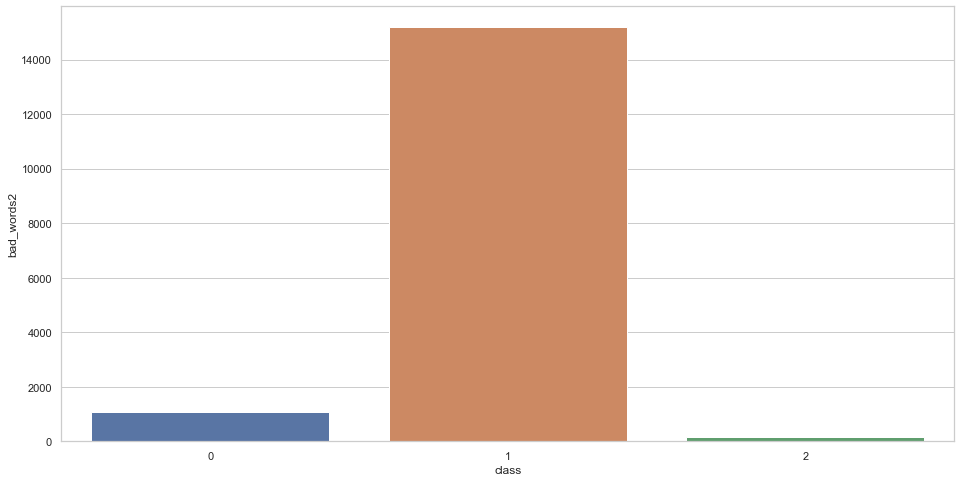

In [60]:
# Group the dataframe for every class and sum 
group = tweets.groupby("class").sum()
# setting the class column as index in order to plot 
group['class'] = group.index

sns.set(style="whitegrid")
# set the size of figure
plt.figure(figsize=(16, 8))
# set the x and y axis 
ax = sns.barplot(x="class", y="bad_words2",data=group)

The class 1 (offencive language) uses the most bad words by far. It is an intuitive result considering that in class 0 (hate speech)they do not necessarily use bad words and in daily life some may use bad words (class 2).